In [3]:
!pip install --upgrade pandas==1.2


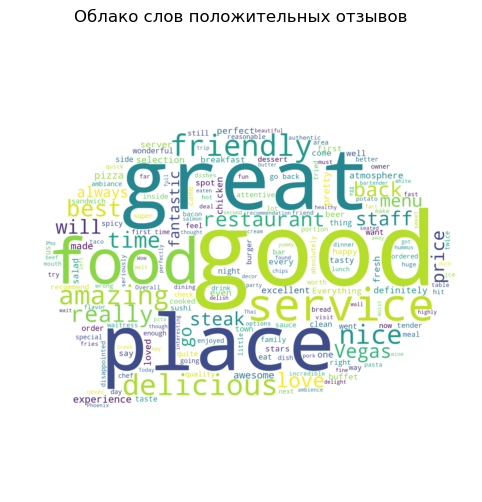

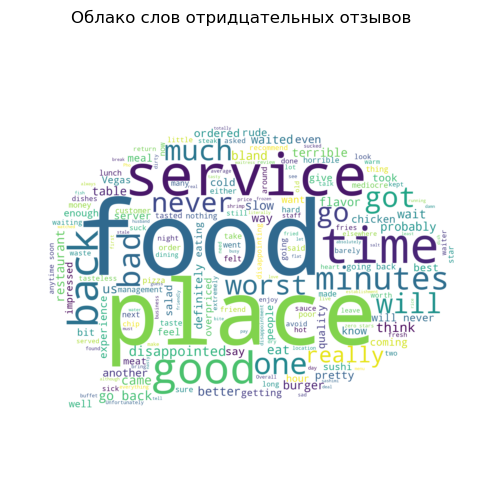

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import warnings
warnings.filterwarnings("ignore")


# Загрузка CSV-файл
df = pd.read_json('restaurant_reviews.json', lines= True )
# Загрузка маски формы отображения мешка слов
star_mask = np.array(Image.open('comment.png'))


def generate_word_cloud(reviews, title):
    """функция для создания облака слов"""
    wordcloud_input = ' '.join(reviews)
    wordcloud = WordCloud(width=1600, height=800, background_color='white',
                          mask=star_mask,).generate(wordcloud_input)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Создаем облако слов для положительных отзывов
positive_reviews = df.loc[df['Liked'] == 1]['Review'].tolist()
generate_word_cloud(positive_reviews, 'Облако слов положительных отзывов')

# Создаем облако слов для отридцательных отзывов
negative_reviews = df.loc[df['Liked'] == 0]['Review'].tolist()
generate_word_cloud(negative_reviews, 'Облако слов отридцательных отзывов')